### Import

In [1]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import sys
import os
from pandas.api.types import is_numeric_dtype




### Load Data

In [2]:
df = pd.read_excel(os.path.abspath(os.path.join('../'))+"/data/Week1_challenge_data_source.xlsx")

### Display some of the data

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
df_clean = df.copy()


### User Overview Analysis

### Top10 Handsets Used by Customer

In [6]:
top_10_handset_types=df["Handset Type"].value_counts().nlargest(n=10)
top_10_handset_types

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

### Top 3 Handset Manufacturers

In [7]:

top_handset_man = df["Handset Manufacturer"].value_counts().nlargest(n=3)
top_handset_man

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

### Top 5 handsets per top 3 manufacturer

In [78]:
# For Apple
apple_df = df[df["Handset Manufacturer"]=="Apple"][["Handset Manufacturer","Handset Type"]]
apple_df["Handset Type"].value_counts().nlargest(10)

Apple iPhone 6S (A1688)         9419
Apple iPhone 6 (A1586)          9023
Apple iPhone 7 (A1778)          6326
Apple iPhone Se (A1723)         5187
Apple iPhone 8 (A1905)          4993
Apple iPhone Xr (A2105)         4568
Apple iPhone X (A1901)          3813
Apple iPhone 8 Plus (A1897)     3016
Apple iPhone 6S Plus (A1687)    2179
Apple iPhone 7 Plus (A1784)     1375
Name: Handset Type, dtype: int64

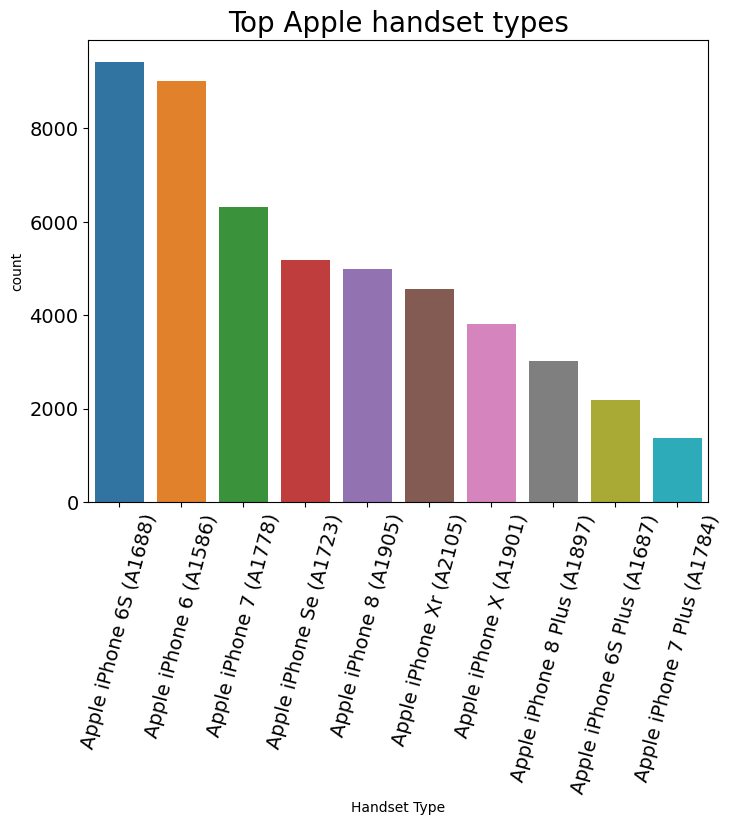

In [79]:
apple_df["count"] = 1
top_apple_handsets = apple_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_apple_handsets, x="Handset Type", y="count")
plt.title("Top Apple handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [81]:
# For Samsung
Samsung_df = df[df["Handset Manufacturer"]=="Samsung"]
Samsung_df["Handset Type"].value_counts().nlargest(10)

Samsung Galaxy S8 (Sm-G950F)         4520
Samsung Galaxy A5 Sm-A520F           3724
Samsung Galaxy J5 (Sm-J530)          3696
Samsung Galaxy J3 (Sm-J330)          3484
Samsung Galaxy S7 (Sm-G930X)         3199
Samsung Galaxy A8 (2018)             2592
Samsung Galaxy S7 Edge (Sm-G935X)    1965
Samsung Galaxy S9 Sm-G960F Ds        1879
Samsung Galaxy A3 (Sm-A320)          1636
Samsung Galaxy S9 Plus (Sm-G965F)    1291
Name: Handset Type, dtype: int64

### Import

In [ ]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import sys
import os
from pandas.api.types import is_numeric_dtype




### Load Data

In [ ]:
df = pd.read_excel(os.path.abspath(os.path.join('../'))+"/data/Week1_challenge_data_source.xlsx")

### Display some of the data

In [ ]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
df_clean = df.copy()


### User Overview Analysis

### Top10 Handsets Used by Customer

In [ ]:
top_10_handset_types=df["Handset Type"].value_counts().nlargest(n=10)
top_10_handset_types

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

### Top 3 Handset Manufacturers

In [ ]:

top_handset_man = df["Handset Manufacturer"].value_counts().nlargest(n=3)
top_handset_man

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

### Top 5 handsets per top 3 manufacturer

In [ ]:
# For Apple
apple_df = df[df["Handset Manufacturer"]=="Apple"][["Handset Manufacturer","Handset Type"]]
apple_df["Handset Type"].value_counts().nlargest(10)

Apple iPhone 6S (A1688)         9419
Apple iPhone 6 (A1586)          9023
Apple iPhone 7 (A1778)          6326
Apple iPhone Se (A1723)         5187
Apple iPhone 8 (A1905)          4993
Apple iPhone Xr (A2105)         4568
Apple iPhone X (A1901)          3813
Apple iPhone 8 Plus (A1897)     3016
Apple iPhone 6S Plus (A1687)    2179
Apple iPhone 7 Plus (A1784)     1375
Name: Handset Type, dtype: int64

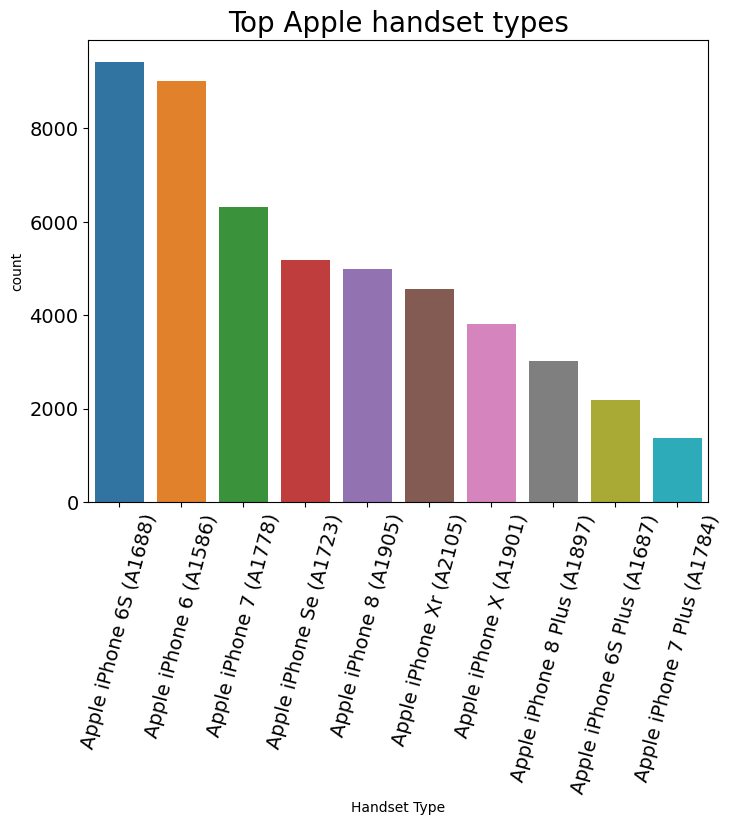

In [ ]:
apple_df["count"] = 1
top_apple_handsets = apple_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_apple_handsets, x="Handset Type", y="count")
plt.title("Top Apple handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# For Samsung
Samsung_df = df[df["Handset Manufacturer"]=="Samsung"]
Samsung_df["Handset Type"].value_counts().nlargest(10)

Samsung Galaxy S8 (Sm-G950F)         4520
Samsung Galaxy A5 Sm-A520F           3724
Samsung Galaxy J5 (Sm-J530)          3696
Samsung Galaxy J3 (Sm-J330)          3484
Samsung Galaxy S7 (Sm-G930X)         3199
Samsung Galaxy A8 (2018)             2592
Samsung Galaxy S7 Edge (Sm-G935X)    1965
Samsung Galaxy S9 Sm-G960F Ds        1879
Samsung Galaxy A3 (Sm-A320)          1636
Samsung Galaxy S9 Plus (Sm-G965F)    1291
Name: Handset Type, dtype: int64

C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\761604997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Samsung_df["count"] = 1


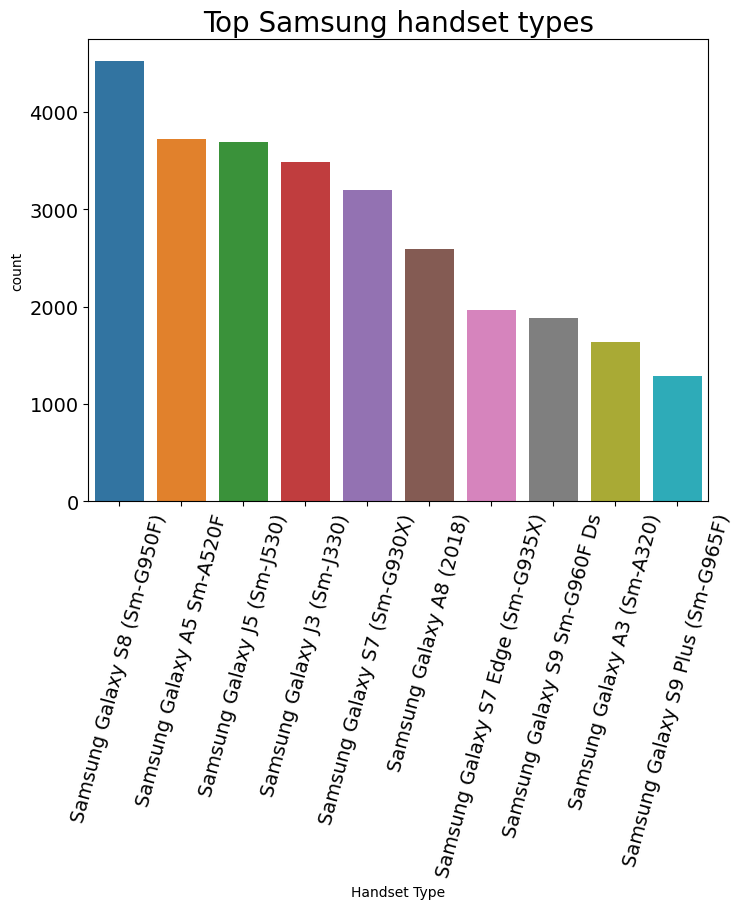

In [ ]:
Samsung_df["count"] = 1
top_samsung_handsets = Samsung_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_samsung_handsets, x="Handset Type", y="count")
plt.title("Top Samsung handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# sns.plt.show()

In [ ]:
# For Huawei
Huawei_df = df[df["Handset Manufacturer"]=="Huawei"][["Handset Manufacturer","Handset Type"]]
Huawei_df["Handset Type"].value_counts().nlargest(10)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Huawei P20 Pro                      965
Huawei Fig-Lx1                      841
Huawei P10 Lite                     591
Huawei P10                          517
Huawei P8 Lite                      458
Name: Handset Type, dtype: int64

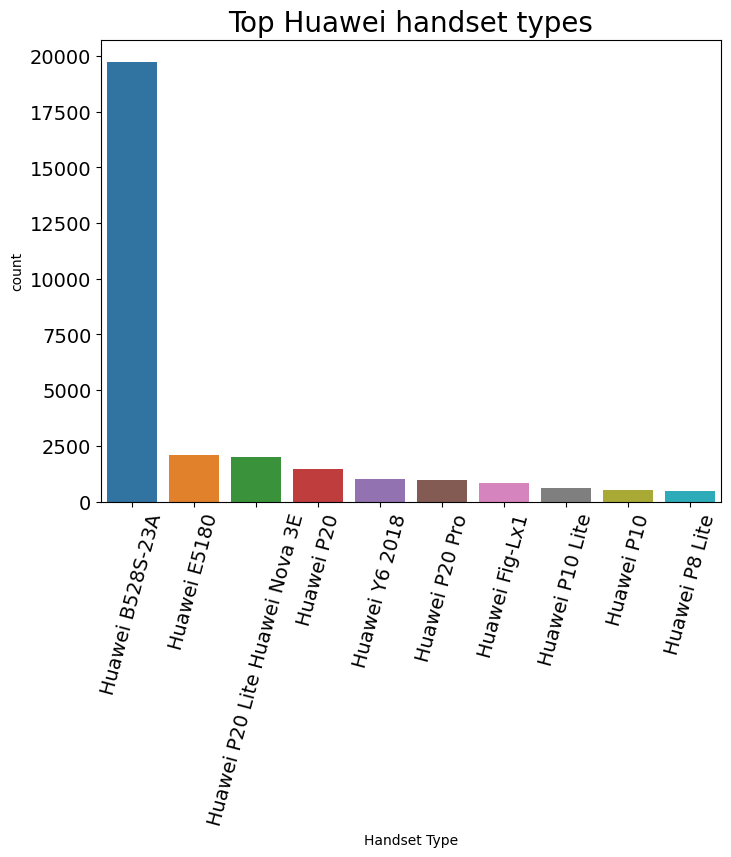

In [ ]:
Huawei_df["count"] = 1
top_huawei_handsets = Huawei_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_huawei_handsets, x="Handset Type", y="count")
plt.title("Top Huawei handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# sns.plt.show()

In [ ]:
df[['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']].describe()


,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"1,795,321.77","32,928.43","5,750,752.62","2,056,541.93","1,791,728.87","467,373.44","11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42"
std,"1,035,482.28","19,006.18","3,309,097.02","1,189,916.93","1,035,839.51","269,969.31","6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69"
min,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00
25%,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00"
50%,"1,794,369.00","32,920.00","5,765,829.00","2,054,573.00","1,793,505.00","466,250.00","11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00"
75%,"2,694,938.00","49,334.00","8,623,552.00","3,088,454.00","2,689,327.00","700,440.00","17,448,518.00","16,515,562.00","17,470,478.00","16,507,268.00","633,174,167.00","12,431,624.00","631,691,786.00","12,384,148.00"
max,"3,586,064.00","65,870.00","11,462,832.00","4,121,357.00","3,586,146.00","936,418.00","23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00"


### Make some interpertation and recommendatioin here...

Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


number of xDR sessions

In [ ]:
df.dropna(subset=["MSISDN/Number","IMSI","IMEI"],inplace=True)

In [ ]:
session_no = df.groupby("MSISDN/Number").agg({"Bearer Id":"count"}).reset_index().sort_values(by="Bearer Id",ascending=False)
session_df = session_no[session_no["Bearer Id"] > 0]
session_df

,MSISDN/Number,Bearer Id
106856,nan,504
13527,33626320676.0,18
6438,33614892860.0,17
13181,33625779332.0,17
37053,33659725664.0,16
...,...,...
41021,33660666399.0,1
41213,33660707537.0,1
41019,33660666325.0,1
41020,33660666329.0,1


Session Duration

In [ ]:
session_duration = df.groupby(['MSISDN/Number'])['Dur. (ms)'].sum()
session_duration

IMSI
2.040471e+14    869844.0
2.040808e+14    877385.0
2.082001e+14     86019.0
2.082001e+14     86254.0
2.082001e+14    573923.0
                  ...   
2.082099e+14    127367.0
2.082099e+14    168543.0
2.082099e+14     86399.0
2.082522e+14     56613.0
2.140743e+14    226790.0
Name: Dur. (ms), Length: 107265, dtype: float64

Total DL & UL Data

In [ ]:
total_DL_UL = df.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\3324154458.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_DL_UL = df.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()


,Total UL (Bytes),Total DL (Bytes)
IMSI,,
2.040471e+14,60456049.0,78697597.0
2.040808e+14,37295915.0,194828056.0
2.082001e+14,53794658.0,31376981.0
2.082001e+14,33583272.0,392918313.0
2.082001e+14,71325004.0,961767023.0
...,...,...
2.082099e+14,33888182.0,688815403.0
2.082099e+14,44692550.0,451173021.0
2.082099e+14,30355487.0,307825104.0


In [ ]:
df.describe(include="all")

C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"149,010.00",150000,"150,000.00",150000,"150,000.00","150,000.00","149,431.00","148,935.00","149,429.00",148848,...,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
unique,NaN,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-04-29 07:08:38,NaN,2019-04-25 00:01:32,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,65,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"10,138,874,654,256,340,992.00",NaN,499.19,NaN,498.80,"104,608.56","208,201,639,651,669.06","41,882,819,545.03","48,474,547,977,654.53",NaN,...,"11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,"2,893,172,512,268,411,392.00",NaN,288.61,NaN,288.10,"81,037.62","21,488,090,841.37","2,447,443,358,621.67","22,416,372,027,957.56",NaN,...,"6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,"6,917,537,518,543,529,984.00",NaN,0.00,NaN,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",NaN,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,246,953,990,144.00",NaN,250.00,NaN,251.00,"57,440.50","208,201,401,263,249.00","33,651,295,581.50","35,460,708,865,439.00",NaN,...,"5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"


In [ ]:
transposed = df.describe().transpose()
transposed["skew"] = df.skew().values
transposed


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\2528227224.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  transposed["skew"] = df.skew().values


,count,mean,std,min,25%,50%,75%,max,skew
Bearer Id,"149,010.00","10,138,874,654,256,340,992.00","2,893,172,512,268,411,392.00","6,917,537,518,543,529,984.00","7,349,883,246,953,990,144.00","7,349,883,264,156,584,960.00","13,042,425,978,957,576,192.00","13,186,541,167,134,199,808.00",0.03
Start ms,"150,000.00",499.19,288.61,0.00,250.00,499.00,749.00,999.00,0.00
End ms,"150,000.00",498.80,288.10,0.00,251.00,500.00,750.00,999.00,-0.00
Dur. (ms),"150,000.00","104,608.56","81,037.62","7,142.00","57,440.50","86,399.00","132,430.25","1,859,336.00",3.95
IMSI,"149,431.00","208,201,639,651,669.06","21,488,090,841.37","204,047,108,489,451.00","208,201,401,263,249.00","208,201,546,329,113.00","208,201,771,619,103.00","214,074,303,349,628.00",41.05
MSISDN/Number,"148,935.00","41,882,819,545.03","2,447,443,358,621.67","33,601,001,722.00","33,651,295,581.50","33,663,706,799.00","33,683,490,769.00","882,397,108,489,451.00",332.16
IMEI,"149,429.00","48,474,547,977,654.53","22,416,372,027,957.56","440,015,202,000.00","35,460,708,865,439.00","35,722,009,426,311.00","86,119,704,674,953.00","99,001,201,327,774.00",1.07
Avg RTT DL (ms),"122,172.00",109.80,619.78,0.00,32.00,45.00,70.00,"96,923.00",62.91
Avg RTT UL (ms),"122,189.00",17.66,84.79,0.00,2.00,5.00,15.00,"7,120.00",28.46
Avg Bearer TP DL (kbps),"150,000.00","13,300.05","23,971.88",0.00,43.00,63.00,"19,710.75","378,160.00",2.59


### Talk about skew and what it means here...

In [ ]:
df_clean = df.copy()

columns = ["Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"Nb of sec with 125000B < Vol DL",
"TCP UL Retrans. Vol (Bytes)",
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 6250B < Vol DL < 31250B",
"TCP DL Retrans. Vol (Bytes)",
"HTTP UL (Bytes)",
"HTTP DL (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Nb of sec with Vol UL < 1250B",
"UL TP > 300 Kbps (%)",
"UL TP < 10 Kbps (%)",
"50 Kbps < UL TP < 300 Kbps (%)",
"10 Kbps < UL TP < 50 Kbps (%)",
"Nb of sec with Vol DL < 6250B",
"DL TP < 50 Kbps (%)",
"DL TP > 1 Mbps (%)",
"250 Kbps < DL TP < 1 Mbps (%)",
"50 Kbps < DL TP < 250 Kbps (%)"],
for name in columns:
    df_clean =  fill_missing_values_with_median(df_clean, name)


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\3871118560.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)


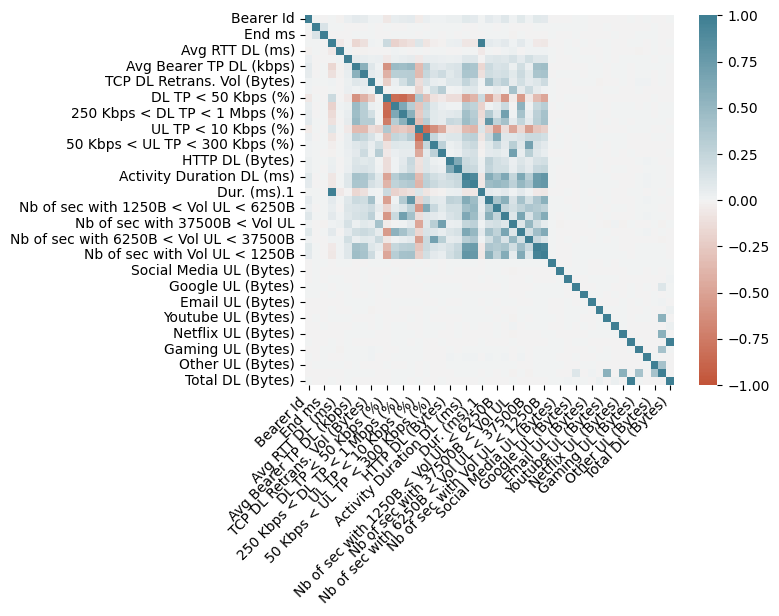

In [ ]:
correlation_heatmap(df.corr())

In [ ]:
df_clean["Bearer Id"] = convert_to_str(df_clean,"Bearer Id")
df["IMSI"] = convert_to_str(df,"IMSI")
df["IMEI"] = convert_to_str(df,"IMEI")
df["MSISDN/Number"] = convert_to_str(df,"MSISDN/Number")


In [ ]:
# df["Bearer Id"] = df["Bearer Id"].astype(str)
# df["IMSI"] = df["IMSI"].astype(str)z
# df["MSISDN/Number  "] = df["MSISDN/Number"].astype(str)
# df["Bearer Id"] = df["Bearer Id"].astype(str)

Aggregate per user the following information in the column  
number of xDR sessions


In [ ]:
df.groupby("IMEI")["Bearer Id"].count().nlargest(10)
# fig = px.histogram(session_df,x="IMSI")
# fig.show()


IMEI
35182310355840.0    18
35281410321760.0    17
35746309624511.0    17
86948003612677.0    16
35405309346774.0    15
86724003047878.0    15
35643708181534.0    13
35171510435028.0    12
35281410289584.0    12
35407509409637.0    12
Name: Bearer Id, dtype: int64

##

C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\761604997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Samsung_df["count"] = 1


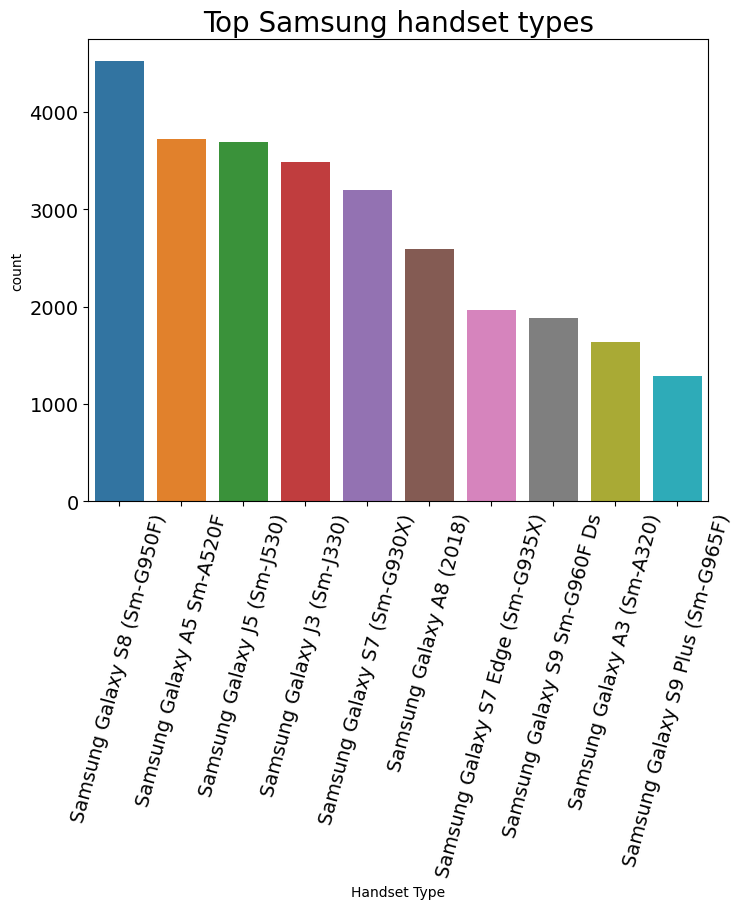

In [76]:
Samsung_df["count"] = 1
top_samsung_handsets = Samsung_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_samsung_handsets, x="Handset Type", y="count")
plt.title("Top Samsung handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# sns.plt.show()

In [51]:
# For Huawei
Huawei_df = df[df["Handset Manufacturer"]=="Huawei"][["Handset Manufacturer","Handset Type"]]
Huawei_df["Handset Type"].value_counts().nlargest(10)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Huawei P20 Pro                      965
Huawei Fig-Lx1                      841
Huawei P10 Lite                     591
Huawei P10                          517
Huawei P8 Lite                      458
Name: Handset Type, dtype: int64

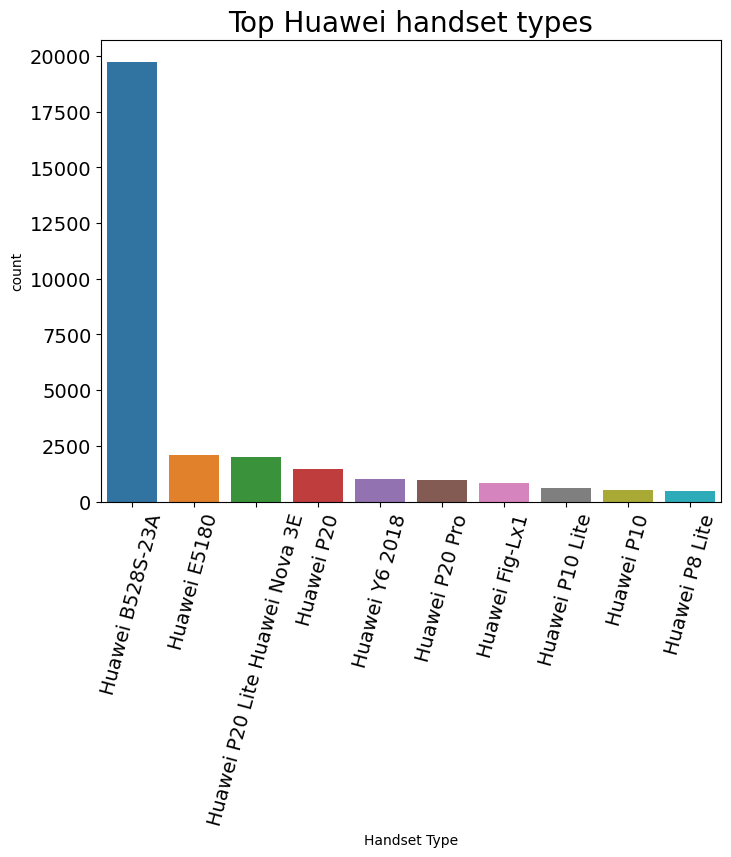

In [80]:
Huawei_df["count"] = 1
top_huawei_handsets = Huawei_df.groupby("Handset Type").agg({"count":"sum"}).reset_index().sort_values(by="count",ascending=False).head(10)
# .sort_values(by="")

plt.figure(figsize=(8, 6))
sns.barplot(data=top_huawei_handsets, x="Handset Type", y="count")
plt.title("Top Huawei handset types", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# sns.plt.show()

In [37]:
df[['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']].describe()


,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,"1,795,321.77","32,928.43","5,750,752.62","2,056,541.93","1,791,728.87","467,373.44","11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42"
std,"1,035,482.28","19,006.18","3,309,097.02","1,189,916.93","1,035,839.51","269,969.31","6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69"
min,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00
25%,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00"
50%,"1,794,369.00","32,920.00","5,765,829.00","2,054,573.00","1,793,505.00","466,250.00","11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00"
75%,"2,694,938.00","49,334.00","8,623,552.00","3,088,454.00","2,689,327.00","700,440.00","17,448,518.00","16,515,562.00","17,470,478.00","16,507,268.00","633,174,167.00","12,431,624.00","631,691,786.00","12,384,148.00"
max,"3,586,064.00","65,870.00","11,462,832.00","4,121,357.00","3,586,146.00","936,418.00","23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00"


### Make some interpertation and recommendatioin here...

Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


number of xDR sessions

In [32]:
df.dropna(subset=["MSISDN/Number","IMSI","IMEI"],inplace=True)

In [33]:
session_no = df.groupby("MSISDN/Number").agg({"Bearer Id":"count"}).reset_index().sort_values(by="Bearer Id",ascending=False)
session_df = session_no[session_no["Bearer Id"] > 0]
session_df

,MSISDN/Number,Bearer Id
106856,nan,504
13527,33626320676.0,18
6438,33614892860.0,17
13181,33625779332.0,17
37053,33659725664.0,16
...,...,...
41021,33660666399.0,1
41213,33660707537.0,1
41019,33660666325.0,1
41020,33660666329.0,1


Session Duration

In [15]:
session_duration = df.groupby(['MSISDN/Number'])['Dur. (ms)'].sum()
session_duration

IMSI
2.040471e+14    869844.0
2.040808e+14    877385.0
2.082001e+14     86019.0
2.082001e+14     86254.0
2.082001e+14    573923.0
                  ...   
2.082099e+14    127367.0
2.082099e+14    168543.0
2.082099e+14     86399.0
2.082522e+14     56613.0
2.140743e+14    226790.0
Name: Dur. (ms), Length: 107265, dtype: float64

Total DL & UL Data

In [16]:
total_DL_UL = df.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\3324154458.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_DL_UL = df.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()


,Total UL (Bytes),Total DL (Bytes)
IMSI,,
2.040471e+14,60456049.0,78697597.0
2.040808e+14,37295915.0,194828056.0
2.082001e+14,53794658.0,31376981.0
2.082001e+14,33583272.0,392918313.0
2.082001e+14,71325004.0,961767023.0
...,...,...
2.082099e+14,33888182.0,688815403.0
2.082099e+14,44692550.0,451173021.0
2.082099e+14,30355487.0,307825104.0


In [19]:
df.describe(include="all")

C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"149,010.00",150000,"150,000.00",150000,"150,000.00","150,000.00","149,431.00","148,935.00","149,429.00",148848,...,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
unique,NaN,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-04-29 07:08:38,NaN,2019-04-25 00:01:32,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,65,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"10,138,874,654,256,340,992.00",NaN,499.19,NaN,498.80,"104,608.56","208,201,639,651,669.06","41,882,819,545.03","48,474,547,977,654.53",NaN,...,"11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,"2,893,172,512,268,411,392.00",NaN,288.61,NaN,288.10,"81,037.62","21,488,090,841.37","2,447,443,358,621.67","22,416,372,027,957.56",NaN,...,"6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,"6,917,537,518,543,529,984.00",NaN,0.00,NaN,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",NaN,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,246,953,990,144.00",NaN,250.00,NaN,251.00,"57,440.50","208,201,401,263,249.00","33,651,295,581.50","35,460,708,865,439.00",NaN,...,"5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"


In [20]:
transposed = df.describe().transpose()
transposed["skew"] = df.skew().values
transposed


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\2528227224.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  transposed["skew"] = df.skew().values


,count,mean,std,min,25%,50%,75%,max,skew
Bearer Id,"149,010.00","10,138,874,654,256,340,992.00","2,893,172,512,268,411,392.00","6,917,537,518,543,529,984.00","7,349,883,246,953,990,144.00","7,349,883,264,156,584,960.00","13,042,425,978,957,576,192.00","13,186,541,167,134,199,808.00",0.03
Start ms,"150,000.00",499.19,288.61,0.00,250.00,499.00,749.00,999.00,0.00
End ms,"150,000.00",498.80,288.10,0.00,251.00,500.00,750.00,999.00,-0.00
Dur. (ms),"150,000.00","104,608.56","81,037.62","7,142.00","57,440.50","86,399.00","132,430.25","1,859,336.00",3.95
IMSI,"149,431.00","208,201,639,651,669.06","21,488,090,841.37","204,047,108,489,451.00","208,201,401,263,249.00","208,201,546,329,113.00","208,201,771,619,103.00","214,074,303,349,628.00",41.05
MSISDN/Number,"148,935.00","41,882,819,545.03","2,447,443,358,621.67","33,601,001,722.00","33,651,295,581.50","33,663,706,799.00","33,683,490,769.00","882,397,108,489,451.00",332.16
IMEI,"149,429.00","48,474,547,977,654.53","22,416,372,027,957.56","440,015,202,000.00","35,460,708,865,439.00","35,722,009,426,311.00","86,119,704,674,953.00","99,001,201,327,774.00",1.07
Avg RTT DL (ms),"122,172.00",109.80,619.78,0.00,32.00,45.00,70.00,"96,923.00",62.91
Avg RTT UL (ms),"122,189.00",17.66,84.79,0.00,2.00,5.00,15.00,"7,120.00",28.46
Avg Bearer TP DL (kbps),"150,000.00","13,300.05","23,971.88",0.00,43.00,63.00,"19,710.75","378,160.00",2.59


### Talk about skew and what it means here...

In [22]:
df_clean = df.copy()

columns = ["Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"Nb of sec with 125000B < Vol DL",
"TCP UL Retrans. Vol (Bytes)",
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 6250B < Vol DL < 31250B",
"TCP DL Retrans. Vol (Bytes)",
"HTTP UL (Bytes)",
"HTTP DL (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Nb of sec with Vol UL < 1250B",
"UL TP > 300 Kbps (%)",
"UL TP < 10 Kbps (%)",
"50 Kbps < UL TP < 300 Kbps (%)",
"10 Kbps < UL TP < 50 Kbps (%)",
"Nb of sec with Vol DL < 6250B",
"DL TP < 50 Kbps (%)",
"DL TP > 1 Mbps (%)",
"250 Kbps < DL TP < 1 Mbps (%)",
"50 Kbps < DL TP < 250 Kbps (%)"],
for name in columns:
    df_clean =  fill_missing_values_with_median(df_clean, name)


C:\Users\Nardos\AppData\Local\Temp\ipykernel_22840\3871118560.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)


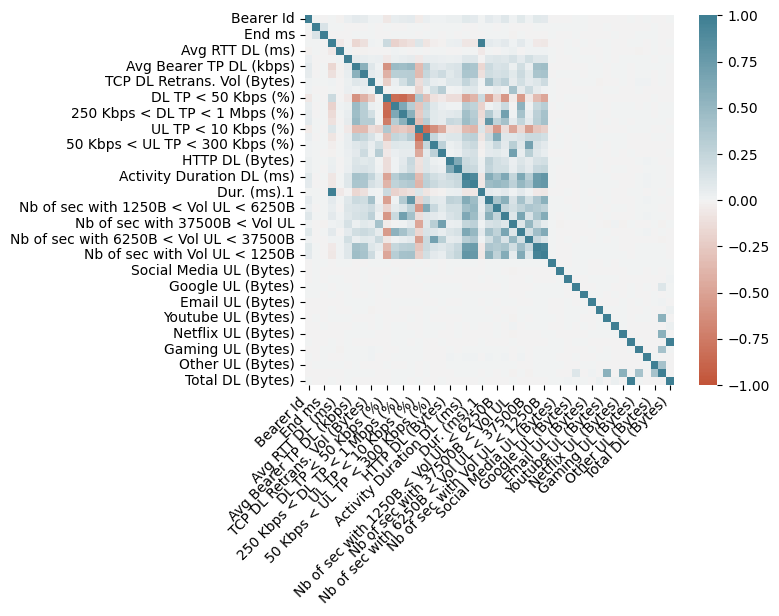

In [38]:
correlation_heatmap(df.corr())

In [24]:
df_clean["Bearer Id"] = convert_to_str(df_clean,"Bearer Id")
df["IMSI"] = convert_to_str(df,"IMSI")
df["IMEI"] = convert_to_str(df,"IMEI")
df["MSISDN/Number"] = convert_to_str(df,"MSISDN/Number")


In [25]:
# df["Bearer Id"] = df["Bearer Id"].astype(str)
# df["IMSI"] = df["IMSI"].astype(str)z
# df["MSISDN/Number  "] = df["MSISDN/Number"].astype(str)
# df["Bearer Id"] = df["Bearer Id"].astype(str)

Aggregate per user the following information in the column  
number of xDR sessions


In [26]:
df.groupby("IMEI")["Bearer Id"].count().nlargest(10)
# fig = px.histogram(session_df,x="IMSI")
# fig.show()


IMEI
35182310355840.0    18
35281410321760.0    17
35746309624511.0    17
86948003612677.0    16
35405309346774.0    15
86724003047878.0    15
35643708181534.0    13
35171510435028.0    12
35281410289584.0    12
35407509409637.0    12
Name: Bearer Id, dtype: int64

##